In [1]:
import pandas
import numpy
import joypy

import matplotlib.pyplot as plt

In [2]:
fl = "/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-fit-profile.tsv"

In [3]:
tab = pandas.read_csv(fl, sep="\t")

In [4]:
tab["Iteration"] = list(range(1, tab.shape[0] + 1))

In [5]:
reference_model = tab.loc[[tab["k"].idxmax()]]
reference_model["Ref"] = "Reference"
reference_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
0,2,10,10,433.445097,0.616967,1131.612347,0.0,1,Reference


In [6]:
selected_model = tab.loc[[tab.shape[0] - 1]]
selected_model["Ref"] = "Selected K"
selected_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
4,9,10,11,433.445097,0.616967,1131.612347,0.0,5,Selected K


In [47]:
min_model = tab.loc[[tab["k"].idxmin()]]
min_model["Ref"] = "No Cluster"
min_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
1,2,6,11,566.825691,0.499099,1131.612347,0.191044,2,No Cluster


In [42]:
ax.yaxis.get_ticklabels()[0]

Text(0,10,'[10]')

/Users/simondi/miniconda3/envs/tix/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


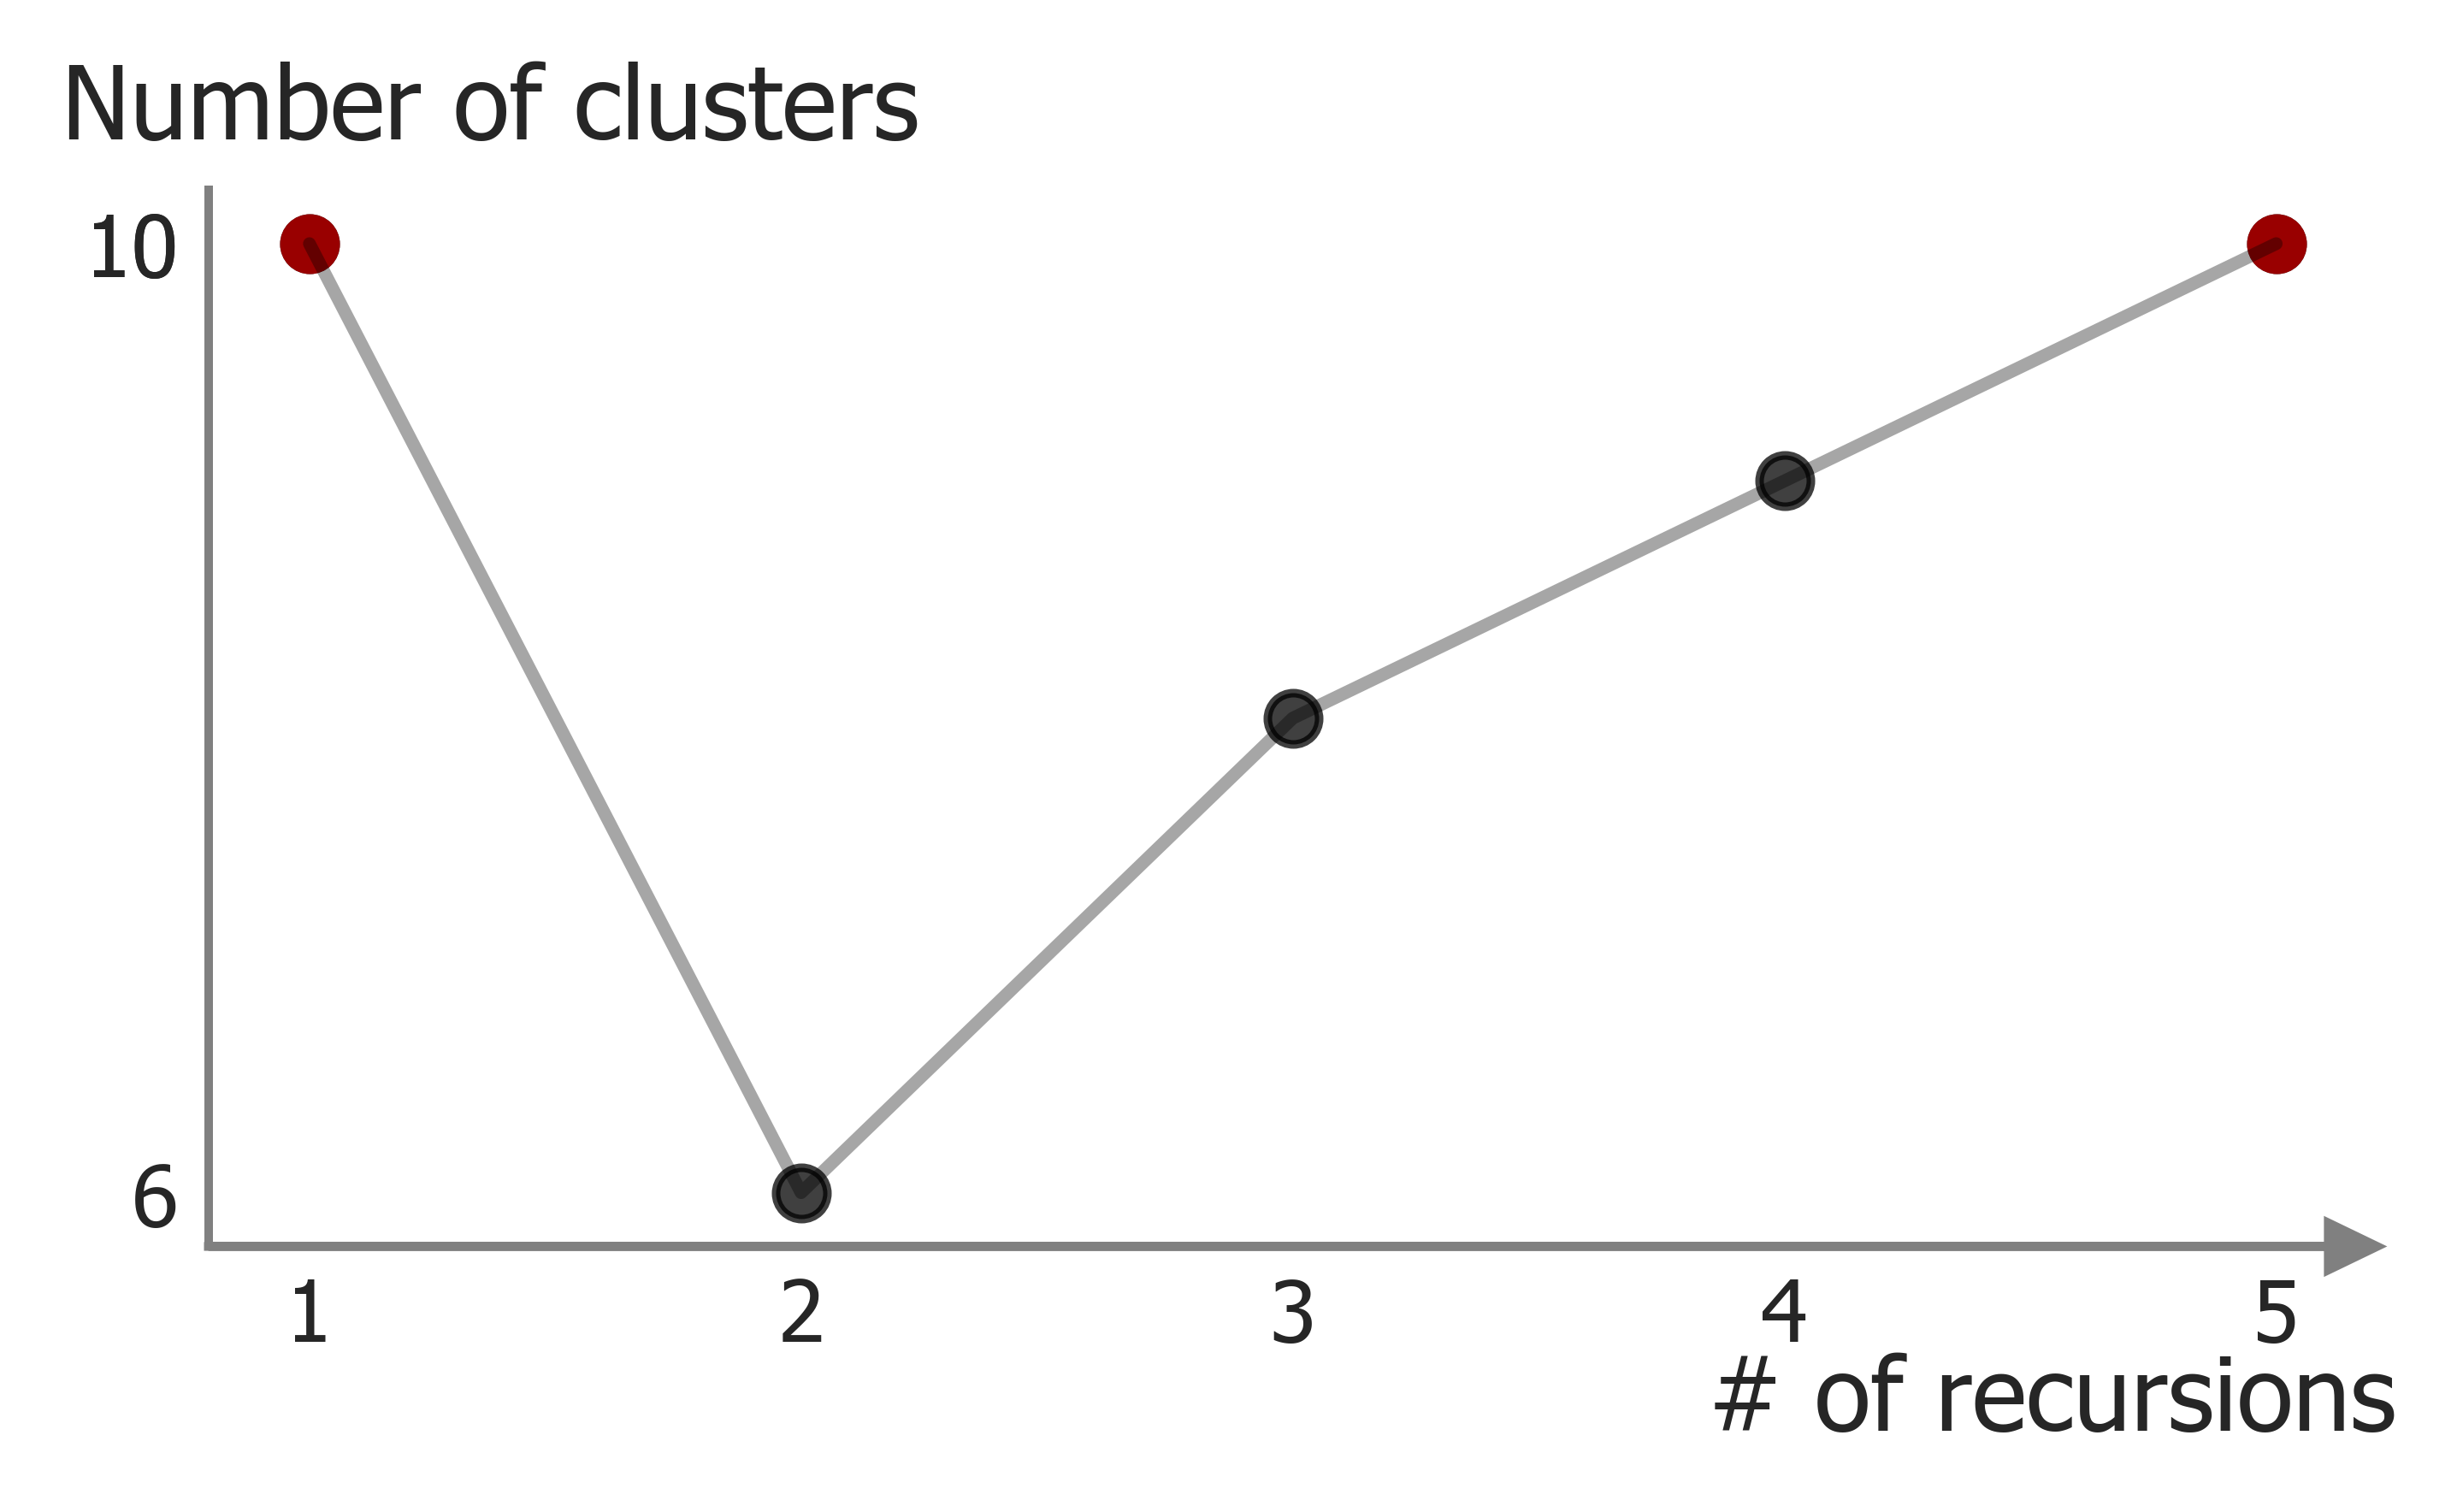

In [65]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

fig = plt.figure(figsize=(10, 5), dpi=720)

ax = plt.subplot(221)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines['left'].set_color('grey')
ax.xaxis.set_label_coords(x=.85, y=-0.1)
ax.yaxis.set_ticks([min_model["k"].values, reference_model["k"].values, selected_model["k"].values])
ax.yaxis.set_label_coords(x=-0.05, y=.885)
ax.grid(linestyle="")
plt.scatter(tab["Iteration"].values, tab["k"].values, color="black", alpha=.75)
plt.plot(tab["Iteration"].values, tab["k"].values, color="black", alpha=.35)
plt.scatter(reference_model["Iteration"].values, reference_model["k"].values, color="#990000", alpha=1)
plt.scatter(selected_model["Iteration"].values, selected_model["k"].values, color="#990000", alpha=1)

xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
 
ax.arrow(xmin, ymin, xmax-xmin, 0,
         head_width=.2, head_length=.1, color="grey",
         length_includes_head= True, clip_on = False) 

plt.xlabel("# of recursions", fontsize=12)
plt.ylabel("", fontsize=15)
plt.title("Number of clusters", x=0.13, fontsize=12)
ax = plt.subplot(221)
plt.show()